# Intoduction to Scikit-Learn(sklearn)

we're going to learn:

0. An end-to-end Scikit-Learn workflow
1. Getting the data ready
2. Choose the right estimator/algorithm for our problems
3. Fit the model/algorithm and use it to make predictions on our data
4. Evaluating a model
5. Improve a model
6. Save and load a trained model
7. Putting it all together!

#### Here we go !

In [2]:
#imports 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

 ## 0. An end-to-end scikit-learn workflow

In [1]:
import numpy as np

In [2]:
# 0. getting data ready

import pandas as pd
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# 1. features matrix
X = heart_disease.drop('target', axis=1)

# target (labels)
y = heart_disease['target']

In [20]:
# 2. choose the right model and hyperparameters

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)

# default hyperparameters

clf.get_params();

In [18]:
# 3. Fit model to the training data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [19]:
clf.fit(X_train, y_train);

In [7]:
# make a prediction
y_preds = clf.predict(X_test)
y_preds

array([1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1])

In [8]:
y_test

36     1
282    0
105    1
45     1
256    0
      ..
218    0
195    0
58     1
95     1
113    1
Name: target, Length: 61, dtype: int64

In [9]:
# 4. Evaluation with training and test data

clf.score(X_train, y_train)

1.0

In [10]:
clf.score(X_test, y_test)

0.8032786885245902

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.87      0.77      0.82        35
           1       0.73      0.85      0.79        26

    accuracy                           0.80        61
   macro avg       0.80      0.81      0.80        61
weighted avg       0.81      0.80      0.80        61



In [12]:
confusion_matrix(y_test, y_preds)

array([[27,  8],
       [ 4, 22]])

In [13]:
accuracy_score(y_test, y_preds)

0.8032786885245902

In [14]:
# Improving model

np.random.seed(42)
for i in range(10,100,10):
    print(f"trying model with {i} estimators....")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"model accuracy: {clf.score(X_test, y_test) *100:.2f}%")
    print(" ")

trying model with 10 estimators....
model accuracy: 80.33%
 
trying model with 20 estimators....
model accuracy: 80.33%
 
trying model with 30 estimators....
model accuracy: 78.69%
 
trying model with 40 estimators....
model accuracy: 78.69%
 
trying model with 50 estimators....
model accuracy: 77.05%
 
trying model with 60 estimators....
model accuracy: 75.41%
 
trying model with 70 estimators....
model accuracy: 78.69%
 
trying model with 80 estimators....
model accuracy: 81.97%
 
trying model with 90 estimators....
model accuracy: 78.69%
 


In [15]:
# 6. save a model

import pickle

pickle.dump(clf, open("random-forest-model1.pkl", "wb"))

In [16]:
loaded_model = pickle.load(open("random-forest-model1.pkl", "rb"))
loaded_model.score(X_test, y_test)

0.7868852459016393

In [79]:
what_were_covering = [
    "0. An end-to-end Scikit-Learn workflow",
    "1. Getting the data ready",
    "2. Choose the right estimator/algorithm for our problems",
    "3. Fit the model/algorithm and use it to make predictions on our data",
    "4. Evaluating a model",
    "5. Improve a model",
    "6. Save and load a trained model",
    "7. Putting it all together!"
]

In [3]:
what_were_covering

['0. An end-to-end Scikit-Learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together!']

## 1. Getting data ready

Three main things we have to do:
1. split the data into features and labels (usually 'X' d'y")
2. Filling (also called imputing) or disregarding missing values
3. Converting non-numerical values to numerical values (also called      feature encoding)

### - splitting to features and labels

In [26]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [28]:
X = heart_disease.drop('target', axis=1)

In [29]:
 X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [32]:
y = heart_disease['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### - splitting into train and test 

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [36]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

### 1.1 Make sure it's all numerical

In [38]:
car_sales = pd.read_csv('data/car-sales-extended.csv')
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [39]:
len(car_sales)

1000

In [42]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [76]:
X = car_sales.drop('Price', axis=1)
y = car_sales['Price']

In [78]:
y

0      15323
1      19943
2      28343
3      13434
4      14043
       ...  
995    32042
996     5716
997    31570
998     4001
999    12732
Name: Price, Length: 1000, dtype: int64

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [80]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test,y_test)

ValueError: could not convert string to float: 'Honda'

In [81]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                 one_hot,
                                 categorical_features)],
                               remainder = "passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [82]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [83]:
dummies = pd.get_dummies(car_sales[['Make', 'Colour', 'Doors']])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [84]:
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                     y,
                                                     test_size=0.2)

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.3235867221569877

### 1.2 what if there is missing value

1. Fill them with some value (also known as imputation).
2. Remove the samples with missing data altogether.

In [86]:
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [90]:
X = car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']

In [87]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

#### Option 1: fill missing data with pandas

In [97]:
car_sales_missing["Make"].fillna("missing", inplace=True)

car_sales_missing["Colour"].fillna("missing", inplace=True)

car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

car_sales_missing["Doors"].fillna(4, inplace=True)

In [96]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [98]:
#### dropping rows with missing target

car_sales_missing.dropna(inplace=True)

In [101]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [107]:
X = car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']

In [111]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                 one_hot,
                                 categorical_features)],
                               remainder = "passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X.toarray()

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 2.48360e+05]])

#### Option 2: fill missing data with scikit-learn

In [112]:
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")

In [113]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [115]:
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [117]:
X = car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

In [127]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

cat_imputer = SimpleImputer(strategy='constant', fill_value="missing")
door_imputer = SimpleImputer(strategy='constant', fill_value=4)
num_imputer = SimpleImputer(strategy='mean')

cat_features = ['Make', 'Colour']
door_feature = ['Doors']
num_feature = ['Odometer (KM)']

#imputation

imputer = ColumnTransformer([
    ('cat_imputer',
    cat_imputer,
    cat_features),
    ('door_imputer',
    door_imputer,
    door_feature),
    ('num_imputer',
    num_imputer,
    num_feature)
])

# transformed
filled_X = imputer.fit_transform(X)


In [130]:
filled_X = pd.DataFrame(filled_X,
                               columns=["Make", "Colour", "Doors", "Odometer"])
filled_X

,Make,Colour,Doors,Odometer
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0
...,...,...,...,...
945,Toyota,Black,4.0,35820.0
946,missing,White,3.0,155144.0
947,Nissan,Blue,4.0,66604.0
948,Honda,White,4.0,215883.0


In [135]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                 one_hot,
                                 categorical_features)],
                               remainder = "passthrough")

transformed_X = transformer.fit_transform(filled_X)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [141]:
# let's fit model

np.random.seed(42)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.21990196728583944

## Choose the right estimator/algorithm for our problems

* Classificaton
* Regression

### Tidbit: 
if structures-> use ensemble <br>
if unstructures -> use deep learning and transfer learning

<img src="./images/sklearn-ml-map.png"/>


### 2.1 picking ml model for regression problem

In [ ]:
# boston housing dataset
from sklearn.datasets import load_boston
boston = load_boston()

In [32]:
boston_df = pd.DataFrame(boston["data"], columns=boston["feature_names"])
boston_df['target'] = pd.Series(boston["target"])
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [8]:
### ridge regression

from sklearn.linear_model import Ridge

np.random.seed(42)

X=boston_df.drop('target', axis=1)
y = boston_df['target']


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = Ridge()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.666222167016852

In [13]:
### lets try RnadomForest

from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X=boston_df.drop('target', axis=1)
y = boston_df['target']


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

rf.score(X_test, y_test)

0.8654448653350507

### 2.2 picking ml model for classification problem

#### SVC

In [33]:
heart_disease = pd.read_csv("data/heart-disease.csv")

# 1. features matrix
X = heart_disease.drop('target', axis=1)

# target (labels)
y = heart_disease['target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)


from sklearn.svm import SVC

model = SVC()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.6229508196721312

#### RandomForest


In [30]:
 heart_disease = pd.read_csv("data/heart-disease.csv")

np.random.seed(42)

# 1. features matrix
X = heart_disease.drop('target', axis=1)

# target (labels)
y = heart_disease['target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)


from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8524590163934426

In [4]:
what_were_covering

['0. An end-to-end Scikit-Learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together!']

## 3. Fit the model/algorithm and use it to make predictions on our data

### fitting the model to data

Different names for:
* `X` = features, features variables, data
* `y` = labels, targets, target variables

In [4]:
heart_disease = pd.read_csv("data/heart-disease.csv")

#setup random seed
np.random.seed(42)

# 1. features matrix
X = heart_disease.drop('target', axis=1)

# target (labels)
y = heart_disease['target']

#split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2) 

# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier
# Initiate Random Forest Classifier
model = RandomForestClassifier()

# fit the model into data(training ml-model)
model.fit(X_train,y_train) 

# Evaluating the model (use the pattern)
model.score(X_test,y_test)

0.8524590163934426

In [9]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


### 3.2 make predictions using a ml-model

1. `predict()`
2. `predict_proba()`

In [11]:
# Use a trained model to make predictions
model.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [13]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [17]:
# compare predictions

y_preds = model.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_preds, y_test)


0.8524590163934426

make predictions with `predict_proba()`



In [29]:
# returns probabilities of a classification label

model.predict_proba(X_test)[:5]

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [21]:
model.predict(X_test[:5])

array([0, 1, 1, 0, 1])

In [25]:
y_test.head()

179    0
228    0
111    1
246    0
60     1
Name: target, dtype: int64

In [27]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [30]:
# boston housing dataset
from sklearn.datasets import load_boston
boston = load_boston()
boston_df = pd.DataFrame(boston["data"], columns=boston["feature_names"])
boston_df['target'] = pd.Series(boston["target"])
boston_df.head()

/Users/nikhil/Desktop/projects/my_learning/env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [39]:

#setup random seed
np.random.seed(42)

# 1. features matrix
X = boston_df.drop('target', axis=1)

# target (labels)
y = boston_df['target']

#split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2) 

# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestRegressor
# Initiate Random Forest Classifier
model = RandomForestRegressor()

# fit the model into data(training ml-model)
model.fit(X_train,y_train) 

y_preds = model.predict(X_test)

In [41]:
y_preds[:10]

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644, 19.113, 15.334,
       21.14 , 20.639])

In [44]:
np.array(y_test.head(10))

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [65]:
(1-(abs(np.array(y_test)-y_preds))/np.array(y_test)).mean()

0.8846736218212479

In [67]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

2.136382352941176

In [52]:
what_were_covering

['0. An end-to-end Scikit-Learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together!']

## 4. Evaluating model

### 3 ways:
1. Estimator score method
2. The scoring parameter
3. Problem-specific metric function


### 4.1 Evaluation with the score method

In [5]:
np.random.seed(42)

# 1. features matrix
X = heart_disease.drop('target', axis=1)

# target (labels)
y = heart_disease['target']

#split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2) 

# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier
# Initiate Random Forest Classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train);

In [71]:
clf.score(X_test, y_test)

0.8524590163934426

In [63]:

#setup random seed
np.random.seed(42)

# 1. features matrix
X = boston_df.drop('target', axis=1)

# target (labels)
y = boston_df['target']

#split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2) 

# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestRegressor
# Initiate Random Forest Classifier
model = RandomForestRegressor()

# fit the model into data(training ml-model)
model.fit(X_train,y_train);


In [60]:
model.score(X_test, y_test)

0.8654448653350507

### 4.2 Evaluation of model using scoring parameter

In [9]:
from sklearn.model_selection import cross_val_score

X = heart_disease.drop('target', axis=1)

# target (labels)
y = heart_disease['target']

np.random.seed(42)
#split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2) 

# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier
# Initiate Random Forest Classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train);

In [79]:
clf.score(X_test, y_test)

0.8688524590163934

In [109]:
cross_val_score(clf, X, y,cv=5).mean()

0.8282513661202187

In [110]:
# default scoring perameter for classifier = mean accuracy (clf.score)
# scoring parameter is none by default

cross_val_score(clf, X, y, scoring=None)

array([0.86885246, 0.8852459 , 0.7704918 , 0.83333333, 0.76666667])

  ### 4.2.1 Classification model evaluation metrics
1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

**Accuracy**

In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

clf = RandomForestClassifier()


cross_val = cross_val_score(clf, X, y, cv=5).mean()

In [132]:
print (f"Heart Disease Classifier cross-validated-Accuracy: {np.mean(cross_val)*100:.2f}%")

Heart Disease Classifier cross-validated-Accuracy: 82.48%


**Area under ROC (Receiver operating charactristic) curve**

ROC curves are a comparision of model's true positive rate (tpr) versus a false positive curve (fpr)

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [136]:
from sklearn.metrics import roc_curve


clf.fit(X_train, y_train)
y_probs = clf.predict_proba(X_test)
y_probs[:10]

array([[0.58, 0.42],
       [0.09, 0.91],
       [0.55, 0.45],
       [0.75, 0.25],
       [0.52, 0.48],
       [0.09, 0.91],
       [0.3 , 0.7 ],
       [0.98, 0.02],
       [0.14, 0.86],
       [0.39, 0.61]])

In [140]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.42, 0.91, 0.45, 0.25, 0.48, 0.91, 0.7 , 0.02, 0.86, 0.61])

In [142]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

fpr

array([0.        , 0.        , 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.10344828,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.17241379,
       0.17241379, 0.20689655, 0.24137931, 0.24137931, 0.27586207,
       0.27586207, 0.31034483, 0.34482759, 0.34482759, 0.44827586,
       0.44827586, 0.51724138, 0.5862069 , 0.5862069 , 0.75862069,
       0.89655172, 0.93103448, 1.        ])

In [156]:
# create a function for plotting ROC curves

import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr,tpr, color="orange", label="ROC")
    plt.plot([0,1], [0,1], color="darkblue", linestyle="--", label="Guessing")
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) curve")
    plt.legend()
    plt.show()

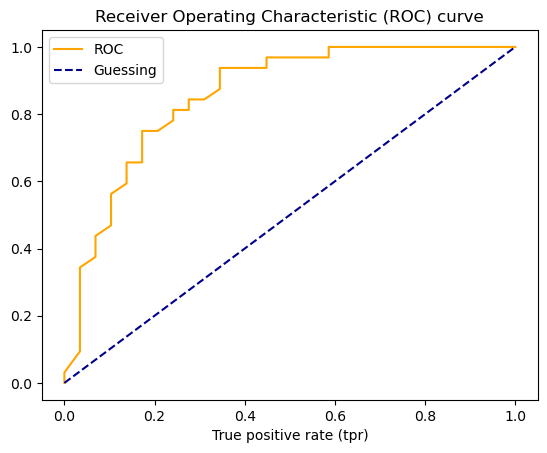

In [145]:
plot_roc_curve(fpr, tpr)

In [146]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8561422413793104

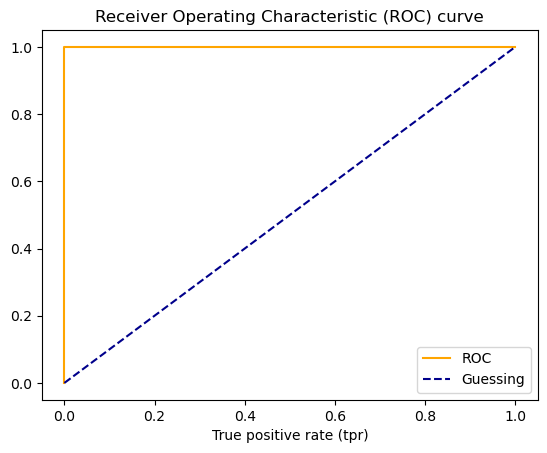

In [147]:
# perfect

fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [148]:
# perfect auc curve
roc_auc_score(y_test, y_test)

1.0

**Confusion matrix**

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.
In essence, giving you an idea of where the model is getting confused.

In [10]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 4, 28]])

In [155]:
# with crosstabs

pd.crosstab(y_test,
           y_preds,
           rownames=["Actual labels"],
           colnames=["Predicted labels"])

Predicted labels,0,1
Actual labels,,
0,24,5
1,8,24


### making confusion matrix more visual

**seaborn.heatmap**

In [16]:
# How install a conda package into the current envrionment from a Jupyter Notebook
import sys
!conda install --yes --prefix {sys.prefix} seaborn


Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 22.11.1

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



<AxesSubplot: >

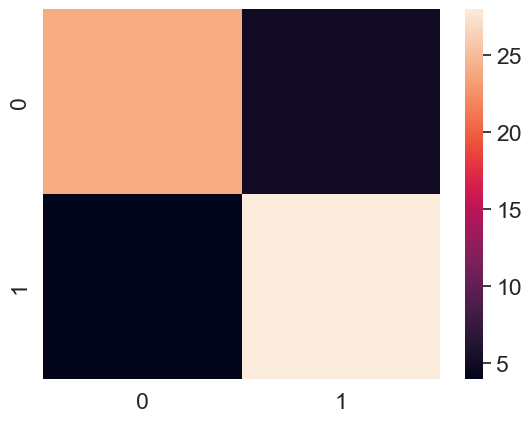

In [11]:
import seaborn as sns

sns.set(font_scale=1.5)

conf_mat = confusion_matrix(y_test, y_preds)

sns.heatmap(conf_mat);

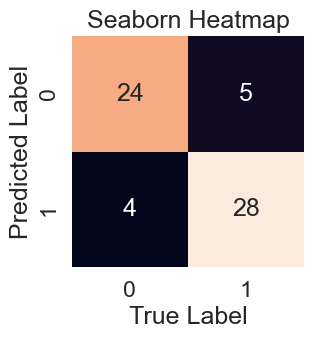

In [13]:
def plot_conf_mat(conf_mat):
    fir,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat,
                    annot = True,
                    cbar = False)
    ax.set(title="Seaborn Heatmap",
      xlabel = "True Label",
      ylabel="Predicted Label")
plot_conf_mat(conf_mat)    

/Users/nikhil/Desktop/projects/my_learning/env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


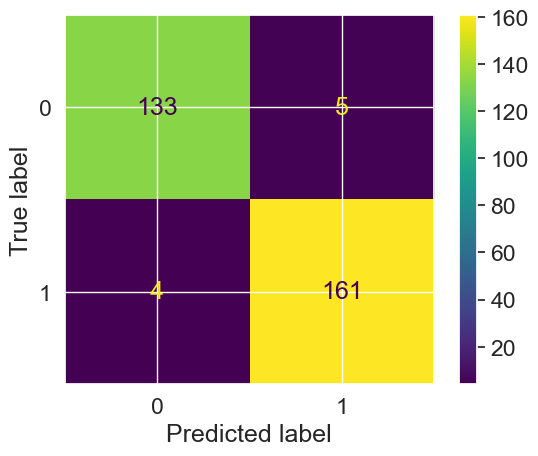

In [20]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X,y);

**Classification Report**

In [21]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [113]:
## where precision and recall becomes valuable

disease_true = np.zeros(10000)
disease_true[0] = 1

disease_preds = np.zeros(10000)

pd.DataFrame(classification_report(disease_true,
                                  disease_preds,
                                  output_dict=True,
                                  zero_division=1))

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,1.0,0.9999,0.999950,0.99990
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


To summarize classification metrics:
* **Accuracy** is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with O or 1).
* **Precision** and **recall** become more important when classes are imbalanced.
* If false positive predictions are worse than false negatives, aim for higher precision.
* If false negative predictions are worse than false positives, aim for higher recall.
* **F1-score** is a combination of precision and recall.

 ### 4.2.2 Regression:

Model evaluation metrics documentation - https://scikit-learn.org/stable/modules/model evaluation.html
1. R^2 (pronounced -squared) or coefficient of determination.
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

**R^2**

What R-squared does: Compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, it's R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.

In [34]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop("target", axis=1)
y = boston_df['target']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

model = RandomForestRegressor()

model.fit(X_train, y_train);

In [35]:
model.score(X_test, y_test)

0.8654448653350507

In [40]:
from sklearn.metrics import r2_score

y_test_mean = np.full(len(y_test), y_test.mean())

In [41]:
r2_score(y_test, y_test_mean)

0.0

In [42]:
r2_score(y_test, y_test)

1.0

 **Mean absolute Error (MEA)**

In [43]:
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)

mea = mean_absolute_error(y_test, y_preds)
mea

2.136382352941176

In [50]:
df = pd.DataFrame({"actual values": y_test,
                  "predicted values": y_preds})
df['difference'] = df['predicted values'] - df['actual values']
df['difference'].head()

173   -0.519
274   -1.826
491    3.159
72     0.660
452    0.793
Name: difference, dtype: float64

In [53]:
abs(df['difference']).mean()

2.136382352941176

**Mean squared error**

In [54]:
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)

msa = mean_squared_error(y_test, y_preds)
msa

9.867437068627442

In [56]:
df = pd.DataFrame({"actual values": y_test,
                  "predicted values": y_preds})
df['difference'] = df['predicted values'] - df['actual values']
(df['difference']**2).mean()

9.867437068627442

### 4.2.3 Using scoring parameter

**Classification**

In [57]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

clf = RandomForestClassifier()

In [58]:
# Accuracy

np.random.seed(42)

cv_acc = cross_val_score(clf, X, y, cv=5, scoring=None)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [59]:
print (f'The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%')

The cross-validated accuracy is: 82.48%


In [61]:
np.random.seed(42)

cv_acc = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print (f'The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%')

The cross-validated accuracy is: 82.48%


In [64]:
# Precision
np.random.seed(42)

cv_precision = cross_val_score(clf, X, y, cv=5, scoring='precision')
cv_precision.mean()

0.8329547346025924

In [65]:
# Recall 
np.random.seed(42)

cv_recall = cross_val_score(clf, X, y, cv=5, scoring='recall')
cv_recall.mean()

0.8545454545454545

In [66]:
# F1 
np.random.seed(42)

cv_f1 = cross_val_score(clf, X, y, cv=5, scoring='f1')
cv_f1.mean()

0.8426854603423346

**Regression**

In [67]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop("target", axis=1)
y = boston_df['target']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

model = RandomForestRegressor()

In [68]:
# R2
np.random.seed(42)

cv_r2 = cross_val_score(model, X, y, scoring=None)
cv_r2.mean()

0.6243870737930857

In [69]:
# MEA
np.random.seed(42)

cv_mea = cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
cv_mea.mean()

-3.0312352552902335

In [70]:
# MSA
np.random.seed(42)

cv_msa = cross_val_score(model, X, y, scoring='neg_mean_squared_error')
cv_msa.mean()

-21.261442856882137

### 4.3 Using different metrics as Scikit-learn functions

**Classification evaluation functions**

In [74]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf=RandomForestClassifier()
clf.fit(X_train, y_train)

y_preds = clf.predict(X_test)

print("classifier metrics on the test set")
print (f"Accuracy: {accuracy_score (y_test, y_preds)*100:.2f}%") 
print (f"Precision:{precision_score(y_test, y_preds)*100:.2f}%")
print (f"Recall:{recall_score(y_test, y_preds)*100:.2f}%")
print (f"F1 score:{f1_score(y_test, y_preds)*100:.2f}%")



classifier metrics on the test set
Accuracy: 85.25%
Precision:84.85%
Recall:87.50%
F1 score:86.15%


**Regression evaluation functions**

In [77]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_log_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = boston_df.drop("target", axis=1)
y = boston_df['target']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)


y_preds = model.predict(X_test)

print("Regressor metrics on the test set")
print (f"R^2:{r2_score (y_test, y_preds)*100:.2f}%") 
print (f"MAE:{mean_absolute_error(y_test, y_preds):.2f}")
print (f"MSE:{mean_squared_error(y_test, y_preds):.2f}")

Regressor metrics on the test set
R^2:86.54%
MAE:2.14
MSE:9.87


## 5. Improving model

First predictions = baseline predictions.
First model = baseline model.
From a data perspective:
* Could we collect more data? (generally, the more data, the better)
* Could we improve our data?

From a model perspective:
* Is there a better model we could use?
* Could we improve the current model?

Hyperparameters vs parameters

* Parameters = model find these patterns in data
* Hyperparameters = settings on a model you can adjust to (potentially) improve its ability to find patterns

Three ways to adjust hyperparameters:
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [82]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()


In [83]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning hyperparameters using hands

let's make 3 sets: train, validation, test. 

We're going to adjust

* `max_depth`
* `max_features`
* `min_sample_leaf`
* `min_sample_split`
* `n_estimators`

In [85]:
def evaluate_preds(y_true, y_preds):
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    
    metric_dict = {'accuracy': round(accuracy,2),
                  'precision': round(precision,2),
                  'recall': round(recall,2),
                  'f1': round(f1,2)}
    print (f"Accuracy: {accuracy*100:.2f}%") 
    print (f"Precision:{precision*100:.2f}%")
    print (f"Recall:{recall*100:.2f}%")
    print (f"F1 score:{f1*100:.2f}%")
    
    return metric_dict

In [156]:
### manually split

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

### shuffle
heart_disease_shuffled = heart_disease.sample(frac=1)

## split into X and y

X = heart_disease_shuffled.drop('target', axis=1)
y = heart_disease_shuffled['target']

## split into train, validation and test

train_split = round(0.7*len(heart_disease_shuffled))
valid_split = round(train_split + 0.15*len(heart_disease_shuffled))

X_train, y_train = X.iloc[:train_split], y.iloc[:train_split]
X_valid, y_valid = X.iloc[train_split:valid_split], y.iloc[train_split:valid_split]
X_test, y_test = X.iloc[valid_split:], y.iloc[valid_split:]

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

## make baseline predictions

y_preds = clf.predict(X_valid)

## evaluate_preds

baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Accuracy: 82.22%
Precision:81.48%
Recall:88.00%
F1 score:84.62%


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [104]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [158]:
# n_estimators

np.random.seed(42)

## create with different hyperparameters


clf2 = RandomForestClassifier(n_estimators=10)
clf2.fit(X_train, y_train)


## make preds
y_preds_2 = clf2.predict(X_valid)

clf2_metics = evaluate_preds(y_valid, y_preds_2)

Accuracy: 82.22%
Precision:84.00%
Recall:84.00%
F1 score:84.00%


In [159]:
## max_depth

clf3 = RandomForestClassifier(max_depth=10)
clf3.fit(X_train, y_train)


## make preds
y_preds_3 = clf3.predict(X_valid)

clf3_metics = evaluate_preds(y_valid, y_preds_3)

Accuracy: 82.22%
Precision:84.00%
Recall:84.00%
F1 score:84.00%


### 5.2 Tuning hyperparameters using RandomizedSeachCv

In [137]:
from sklearn.model_selection import RandomizedSearchCV

grid = {'n_estimators':[10, 100, 200, 500, 1000, 1200],
       'max_depth': [None, 5,10,20,30],
       'min_samples_split': [2,4,6],
       'min_samples_leaf': [1,2,4]}

np.random.seed(42)

X = heart_disease_shuffled.drop('target', axis=1)
y = heart_disease_shuffled['target']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

clf = RandomForestClassifier(n_jobs=1)

# setup RandomizedSearchCV

rs_clf = RandomizedSearchCV(estimator=clf,
                           param_distributions=grid,
                           n_iter = 10, #number of models to try
                           cv=5,
                           verbose=2)

### fit the RandomizedSearchCV version of clf

rs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   0.8s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   0.8s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   0.8s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   0.8s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   0.8s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, m

[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.7s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=1000;

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estim

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1), n_iter=50,
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [139]:
rs_clf.best_params_

{'n_estimators': 500,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_depth': 20}

In [153]:
rs_y_preds = rs_clf.predict(X_test)
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Accuracy: 81.97%
Precision:77.42%
Recall:85.71%
F1 score:81.36%


### 5.3 Tuning hyperparameters using GridSeachCv

-> difference is n_iter

In [143]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [148]:
# close to best hyperparameters

grid_2 = {
    'n_estimators': [200, 500, 600],
     'max_depth': [10, 20],
     'min_samples_split': [4],
     'min_samples_leaf': [1, 2, 4]
}

In [147]:
3*2*3*5

90

In [172]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

X = heart_disease_shuffled.drop('target', axis=1)
y = heart_disease_shuffled['target']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

clf = RandomForestClassifier(n_jobs=1)

# setup GridSearchCV

gs_clf = GridSearchCV(
                    estimator=clf,
                    param_grid=grid_2,
                    cv=5,
                    verbose=2)

### fit the RandomizedSearchCV version of clf

gs_clf.fit(X_train, y_train)

In [150]:
gs_clf.best_params_

{'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 600}

In [151]:
gs_y_preds = gs_clf.predict(X_test)
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Accuracy: 80.33%
Precision:75.00%
Recall:85.71%
F1 score:80.00%


**Let's compare our different model metrics**

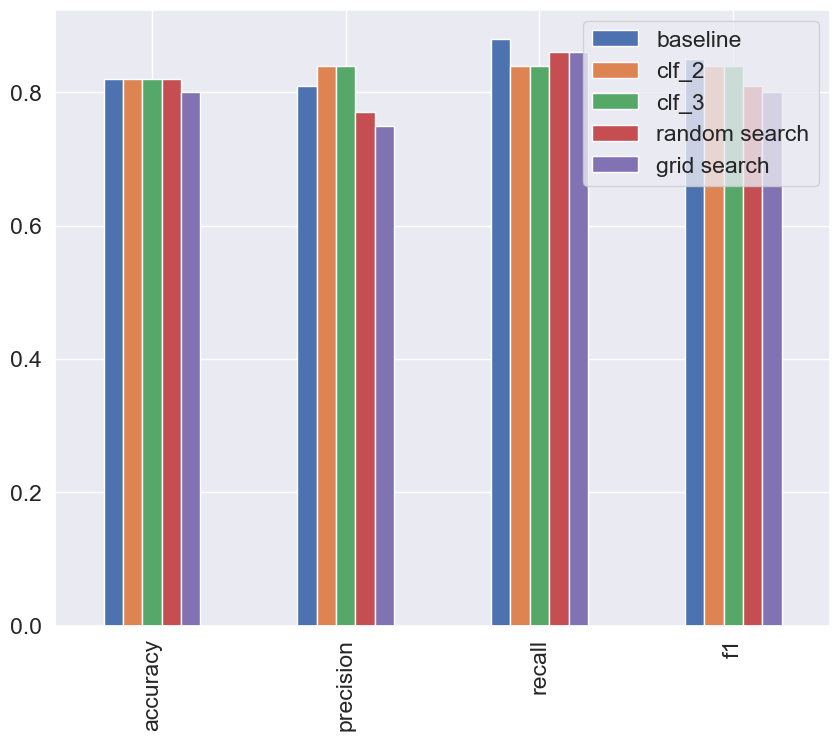

In [164]:
compare_marics = pd.DataFrame({
    'baseline': baseline_metrics,
    'clf_2': clf2_metics,
    'clf_3': clf3_metics,
    'random search': rs_metrics,
    'grid search': gs_metrics
})

compare_marics.plot.bar(figsize=(10,8));

## 6. Save and load a trained model

Two ways:
1. with python `pickle` module
2. with `joblib` module

**Pickle**

In [168]:
import pickle

# save an existing model to file
pickle.dump(gs_clf, open("./models/gs_randomforest_model_1.pkl", "wb"))

In [169]:
 ## load a model
    
loaded_pickle_model = pickle.load(open("./models/gs_randomforest_model_1.pkl", "rb"))

In [174]:
# predicts

pickle_y_preds = loaded_pickle_model.predict(X_test)

In [175]:
evaluate_preds(y_test, pickle_y_preds)

Accuracy: 80.33%
Precision:75.00%
Recall:85.71%
F1 score:80.00%


{'accuracy': 0.8, 'precision': 0.75, 'recall': 0.86, 'f1': 0.8}

In [ ]:
Accuracy: 80.33%
Precision:75.00%
Recall:85.71%
F1 score:80.00%

**Joblib**

In [176]:
from joblib import dump, load

#save

dump(gs_clf, filename="./models/gs_random_forest_joblib_model.joblib")

['./models/gs_random_forest_joblib_model.joblib']

In [177]:
loaded_job_model = load(filename="./models/gs_random_forest_joblib_model.joblib")

In [178]:
# predicts

job_y_preds = loaded_job_model.predict(X_test)
evaluate_preds(y_test, job_y_preds)

Accuracy: 80.33%
Precision:75.00%
Recall:85.71%
F1 score:80.00%


{'accuracy': 0.8, 'precision': 0.75, 'recall': 0.86, 'f1': 0.8}

## 7. Put it all together!

In [180]:
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [185]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [186]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

**Steps we want to do (all in one cell):**
1. Fill missing data
2. Convert data to numbers
3. Build a model on the data

In [197]:
# getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

from sklearn.pipeline import Pipeline

# Modelling

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# random seed
import numpy as np
np.random.seed(42)

# import data
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data.dropna(subset=['Price'], inplace=True)

# define different features and transformer pipeline
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown='ignore') )
])

door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))])

num_feature = ["Odometer (KM)"]
num_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="mean"))])

## preprocessing (fill missing, covert to nums)

preprocessor = ColumnTransformer(
    transformers = [("cat", categorical_transformer, categorical_features),
                   ("door", door_transformer, door_feature),
                   ("num", num_transformer, num_feature)])

## create a preprocessing and modelling pipline

model = Pipeline(steps=[("preprocessor", preprocessor),
                       ("model", RandomForestClassifier())])


## split data

X = data.drop("Price", axis=1)
y = data["Price"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

# fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)





0.0

In [201]:
# Use GridSearchC with our regression Pipeline
from sklearn.model_selection import GridSearchCV
pipe_grid = {
"preprocessor__num__imputer__strategy": ["mean", "median"],
"model__n_estimators": [100, 1000],
"model_max_depth": [None, 5],
"model_max_features": ["auto"],
"model_min_samples_split": [2, 4]
}
gs_model = GridSearchCV (model, pipe_grid, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


ValueError: n_splits=5 cannot be greater than the number of members in each class.